In [5]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/AKSHAIYA/Datasets/main/train_v9rqX0R.csv")

In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [11]:
data.duplicated().sum()

0

In [12]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

Item_Weight
Outliers =  Series([], Name: Item_Weight, dtype: float64)
Item_Visibility
Outliers =  49      0.255395
83      0.293418
108     0.278974
174     0.291865
334     0.204700
          ...   
8292    0.209163
8345    0.266397
8371    0.214125
8432    0.227261
8509    0.214306
Name: Item_Visibility, Length: 144, dtype: float64
Item_MRP
Outliers =  Series([], Name: Item_MRP, dtype: float64)
Outlet_Establishment_Year
Outliers =  Series([], Name: Outlet_Establishment_Year, dtype: int64)


In [14]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
data.Item_Identifier.value_counts()

FDG33    10
FDW13    10
FDT07     9
FDX04     9
FDU12     9
         ..
FDY43     1
FDT35     1
FDC23     1
FDO33     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [16]:
data.Item_Weight.value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [17]:
data.Item_Weight.isna().sum()

1463

In [18]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [19]:
data['Item_Weight'].mode()

0    12.15
dtype: float64

In [20]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace= True)

In [22]:
data['Item_Weight'].isna().sum()

0

In [23]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
data['Item_Fat_Content'].isna().sum()

0

In [25]:
data["Item_Fat_Content"].replace({"reg":"Regular", "LF" : "Low Fat" , "low fat" : "Low Fat"},inplace= True)

In [26]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
data['Item_Fat_Content'].isna().sum()

0

In [28]:
data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [29]:
data['Item_Visibility'].isna().sum()

0

In [30]:
data.loc[:, 'Item_Visibility'].replace([0], [data['Item_Visibility'].mean()], inplace=True)

In [31]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [32]:
data['Item_Type'].isna().sum()

0

In [33]:
data['Item_Type'].replace({'Fruits and Vegetables':0,
                     'Dairy':1,
                     'Breads':2,
                     'Meat':3,
                     'Frozen Foods':4,
                     'Seafood':5,
                     'Hard Drinks':6,
                     'Soft Drinks':7,
                     'Canned':8,
                     'Snack Foods':9,
                     'Baking Goods':10,
                     'Starchy Foods': 11,
                     'Household':12,
                     'Health and Hygiene' : 13,
                     'Breakfast':14,
                     'Others' : 15
                      }, inplace = True)

In [34]:
data['Item_Type'].value_counts()

0     1232
9     1200
12     910
4      856
1      682
8      649
10     648
13     520
7      445
3      425
2      251
6      214
15     169
11     148
14     110
5       64
Name: Item_Type, dtype: int64

In [35]:
data['Item_MRP'].value_counts()

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

In [36]:
data['Item_Type'].isna().sum()

0

In [37]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [38]:
data['Outlet_Identifier'].isna().sum()

0

In [39]:
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [40]:
data['Outlet_Establishment_Year'].isna().sum()

0

In [41]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [42]:
data['Outlet_Size'].isna().sum()

2410

In [43]:
data['Outlet_Size'].mode()

0    Medium
dtype: object

In [44]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace= True)

In [45]:
data['Outlet_Size'].isna().sum()

0

In [46]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [47]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [48]:
data['Outlet_Location_Type'].isna().sum()

0

In [49]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [50]:
data['Outlet_Type'].isna().sum()

0

In [51]:
#we are removing job column because we have done label encoding before
numerical_data = data.select_dtypes(include=np.number).drop(columns=['Item_Type','Outlet_Establishment_Year'])

In [52]:
numerical_data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.066132,182.0950,732.3800
4,8.930,0.066132,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


In [53]:
categorical_data = data.select_dtypes(exclude=np.number).drop(columns=['Item_Identifier','Outlet_Identifier'])

In [54]:
categorical_data

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Medium,Tier 1,Supermarket Type1
1,Regular,Medium,Tier 3,Supermarket Type2
2,Low Fat,Medium,Tier 1,Supermarket Type1
3,Regular,Medium,Tier 3,Grocery Store
4,Low Fat,High,Tier 3,Supermarket Type1
...,...,...,...,...
8518,Low Fat,High,Tier 3,Supermarket Type1
8519,Regular,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Small,Tier 2,Supermarket Type1
8521,Regular,Medium,Tier 3,Supermarket Type2


In [55]:
#Performng standard scaling
from sklearn.preprocessing import StandardScaler
 
std_scale = StandardScaler()
data_std = std_scale.fit_transform(numerical_data)

In [56]:
data_std

array([[-0.84187169, -1.11135787,  1.74745381,  0.910601  ],
       [-1.64170589, -1.04506727, -1.48902325, -1.01844035],
       [ 1.09855449, -1.09673346,  0.01004021, -0.04923754],
       ...,
       [-0.53424315, -0.71867224, -0.89720755, -0.57909963],
       [-1.33644372,  1.53896846, -0.60797692, -0.19672492],
       [ 0.45963367, -0.51981553, -1.05226104, -0.82959407]])

In [57]:
numerical_data_preprocessed = pd.DataFrame(data_std,columns = numerical_data.columns)

In [58]:
numerical_data_preprocessed

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.841872,-1.111358,1.747454,0.910601
1,-1.641706,-1.045067,-1.489023,-1.018440
2,1.098554,-1.096733,0.010040,-0.049238
3,1.500838,-0.083740,0.660050,-0.849103
4,-0.929428,-0.083740,-1.399220,-0.695373
...,...,...,...,...
8518,-1.418084,-0.275551,1.180783,0.349915
8519,-1.059578,-0.476643,-0.527301,-0.956402
8520,-0.534243,-0.718672,-0.897208,-0.579100
8521,-1.336444,1.538968,-0.607977,-0.196725


In [59]:
categorical_data_processed = pd.get_dummies(categorical_data) #will put 0 or 1 according to present r not

In [60]:
categorical_data_processed

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,1,0,1,0,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,1,0,0
3,0,1,0,1,0,0,0,1,1,0,0,0
4,1,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,1,0,0,0,0,1,0,1,0,0
8519,0,1,0,1,0,0,1,0,0,1,0,0
8520,1,0,0,0,1,0,1,0,0,1,0,0
8521,0,1,0,1,0,0,0,1,0,0,1,0


In [61]:
pre_processed_data = pd.concat([numerical_data_preprocessed,categorical_data_processed,data[['Item_Type','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier']]], axis = 1)

In [62]:
pre_processed_data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type,Outlet_Establishment_Year,Item_Identifier,Outlet_Identifier
0,-0.841872,-1.111358,1.747454,0.910601,1,0,0,1,0,1,0,0,0,1,0,0,1,1999,FDA15,OUT049
1,-1.641706,-1.045067,-1.489023,-1.018440,0,1,0,1,0,0,0,1,0,0,1,0,7,2009,DRC01,OUT018
2,1.098554,-1.096733,0.010040,-0.049238,1,0,0,1,0,1,0,0,0,1,0,0,3,1999,FDN15,OUT049
3,1.500838,-0.083740,0.660050,-0.849103,0,1,0,1,0,0,0,1,1,0,0,0,0,1998,FDX07,OUT010
4,-0.929428,-0.083740,-1.399220,-0.695373,1,0,1,0,0,0,0,1,0,1,0,0,12,1987,NCD19,OUT013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.275551,1.180783,0.349915,1,0,1,0,0,0,0,1,0,1,0,0,9,1987,FDF22,OUT013
8519,-1.059578,-0.476643,-0.527301,-0.956402,0,1,0,1,0,0,1,0,0,1,0,0,10,2002,FDS36,OUT045
8520,-0.534243,-0.718672,-0.897208,-0.579100,1,0,0,0,1,0,1,0,0,1,0,0,13,2004,NCJ29,OUT035
8521,-1.336444,1.538968,-0.607977,-0.196725,0,1,0,1,0,0,0,1,0,0,1,0,9,2009,FDN46,OUT018


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


C:\Users\Akshaiya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

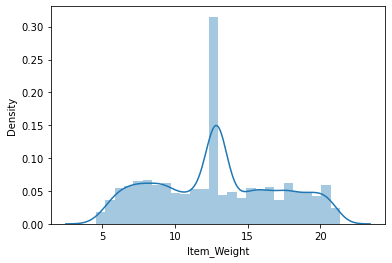

In [64]:
sns.distplot(data['Item_Weight'])

C:\Users\Akshaiya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

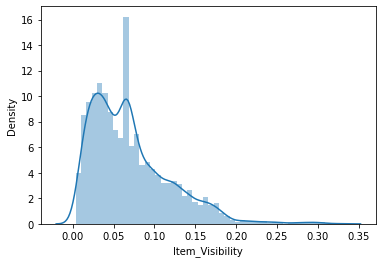

In [65]:
sns.distplot(data['Item_Visibility'])

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression()

In [70]:
model.fit(data[['Item_MRP']],data['Item_Outlet_Sales'])

LinearRegression()

In [71]:
m = model.coef_
b = model.intercept_

In [72]:
model_pred_sales= model.predict(data[['Item_MRP']])

In [73]:
model_pred_sales

array([3873.71322408,  739.1568608 , 2191.01294418, ..., 1312.33554775,
       1592.45794404, 1162.16488431])

In [74]:
actual_sales = data['Item_Outlet_Sales']

In [75]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [76]:
mean_squared_error(actual_sales,model_pred_sales)

1973790.0540609627

In [77]:
mean_absolute_error(actual_sales,model_pred_sales)

1032.0262957388184

In [78]:
np.sqrt(mean_squared_error(actual_sales,model_pred_sales))

1404.916386857582

In [79]:
r2_score(actual_sales,model_pred_sales)

0.3221407524979081

In [80]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(actual_sales,model_pred_sales )


143.93268843051817

In [81]:
import matplotlib.pyplot as plt

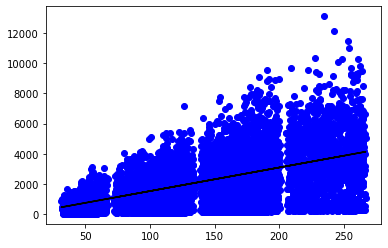

In [84]:
plt.scatter(data["Item_MRP"],data["Item_Outlet_Sales"], color='blue')
plt.plot(data["Item_MRP"],model_pred_sales, color='black')

plt.show()